In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_Caso_Propuesto.csv')
df

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
458,12709,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 562 CENTRO COMERCIAL SA...,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.960534e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...
459,17992,BOGOTA,CUNDINAMARCA,NaN,CR 70 NO. 49-77,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.448242e+09,CASA,NaN
460,12708,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 564 CENTRO COMERCIAL SAN...,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.070134e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...
461,12706,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 367 CENTRO COMERCIAL SAN...,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.060800e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...


# ¿Como varia el precio de las casas o negocios segun el estrato?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


In [4]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


In [7]:
cantidad_valores_cero_areac = (df['Area Construida'] == 0).sum()
cantidad_valores_cero_areac

np.int64(453)

In [8]:
cantidad_valores_cero_areat = (df['Area Terreno'] == 0).sum()
cantidad_valores_cero_areat

np.int64(445)

In [9]:
df['Estrato'].value_counts()

Estrato
COMERCIAL     307
RURAL          40
UNO            21
TRES           19
CUATRO         19
INDUSTRIAL     16
DOS            16
SEIS           15
CINCO          10
Name: count, dtype: int64

In [10]:
df['Detalle Disponibilidad'].value_counts()

Detalle Disponibilidad
COMERCIALIZABLE                     289
COMERCIALIZABLE CON RESTRICCION      83
COMERCIALIZABLE TERCEROS             41
EN PUJA                              23
COMERCIALIZABLE VENTA ANTICIPADA     14
COMERCIALIZABLE FIDUCIA              13
Name: count, dtype: int64

In [11]:
df.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,463.000000,4.630000e+02,463.000000,4.630000e+02
mean,18003.151188,1.515204e+04,87.517279,6.672032e+08
std,1992.191499,1.827101e+05,1137.469077,3.272992e+09
min,2575.000000,0.000000e+00,0.000000,4.650000e+06
25%,18184.500000,0.000000e+00,0.000000,1.230500e+07
50%,18332.000000,0.000000e+00,0.000000,1.587000e+07
75%,18539.500000,0.000000e+00,0.000000,1.379955e+08
max,19344.000000,3.217197e+06,22724.000000,4.523379e+10


In [12]:
rango = [4650000, 12300000, 15870000, 137700000, 667000000, 45330000000]
rango_precios = ['BAJO', 'MEDIANO', 'ALTO', 'ELEVADO', 'CARO']
df['Rango_precio'] = pd.cut(df['Precio'], rango, labels= rango_precios)
df.head(5)

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales,Rango_precio
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...,CARO
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN,CARO
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN,CARO
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...,CARO
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN,CARO


In [13]:
df['Rango_precio'].value_counts()

Rango_precio
MEDIANO    140
ALTO       115
BAJO        91
CARO        61
ELEVADO     55
Name: count, dtype: int64

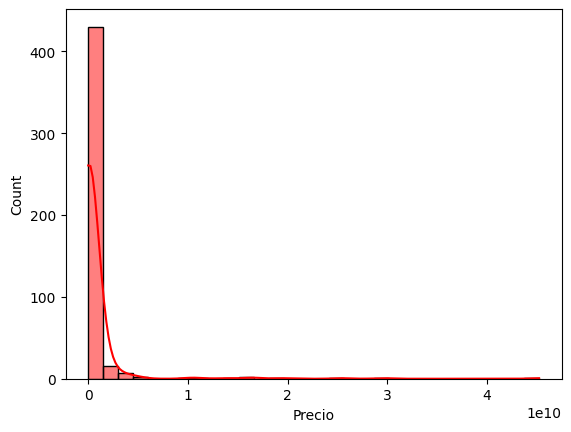

In [14]:
sns.histplot(df.Precio, color= 'r', bins= 30, kde= True)
plt.show()

C:\Users\Germa\AppData\Local\Temp\ipykernel_5728\3460736844.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rango_precio = df['Rango_precio'].groupby(df['Rango_precio']).count()


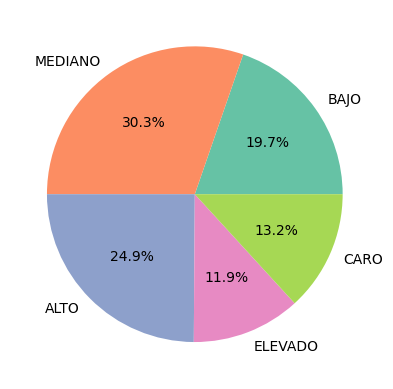

In [15]:
total_rango_precio = df['Rango_precio'].groupby(df['Rango_precio']).count()
labels = ['BAJO', 'MEDIANO', 'ALTO', 'ELEVADO', 'CARO']
colors = sns.color_palette('Set2')[0:5]
plt.pie(total_rango_precio, labels= labels, colors= colors, autopct= '%.1f%%')
plt.show()

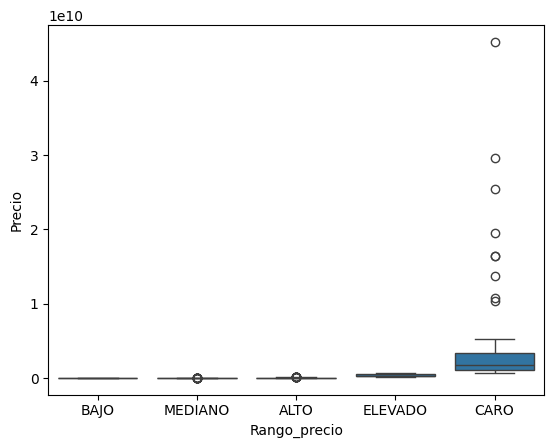

In [16]:
rango_precio_estarto = sns.boxplot(x= df['Rango_precio'], y= df['Precio'])

<Axes: xlabel='Rango_precio', ylabel='Precio'>

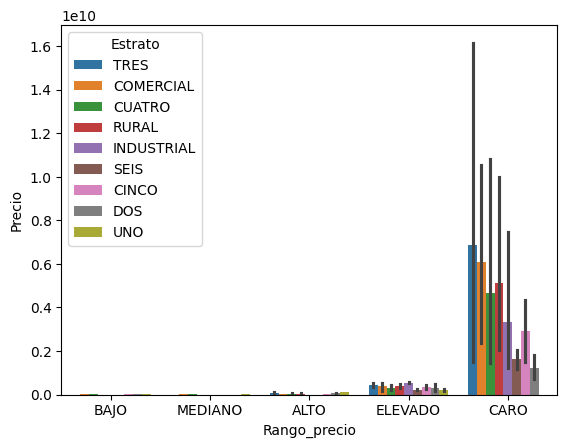

In [17]:
sns.barplot(data= df, x= 'Rango_precio', y= 'Precio', hue= 'Estrato')
